# 1. IMPORTANDO BIBLIOTECAS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import graphviz
from dtreeviz.trees import *
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


 O dataset esta disponivel em: https://www.kaggle.com/datasets/priyanka841/heart-disease-prediction-uci

In [ ]:
dfheart = pd.read_csv('/content/gdrive/MyDrive/DATABASES/heart.csv')

# 2 TRATAMENTO DOS DADOS.

In [ ]:
dfheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dfheart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
dfheart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


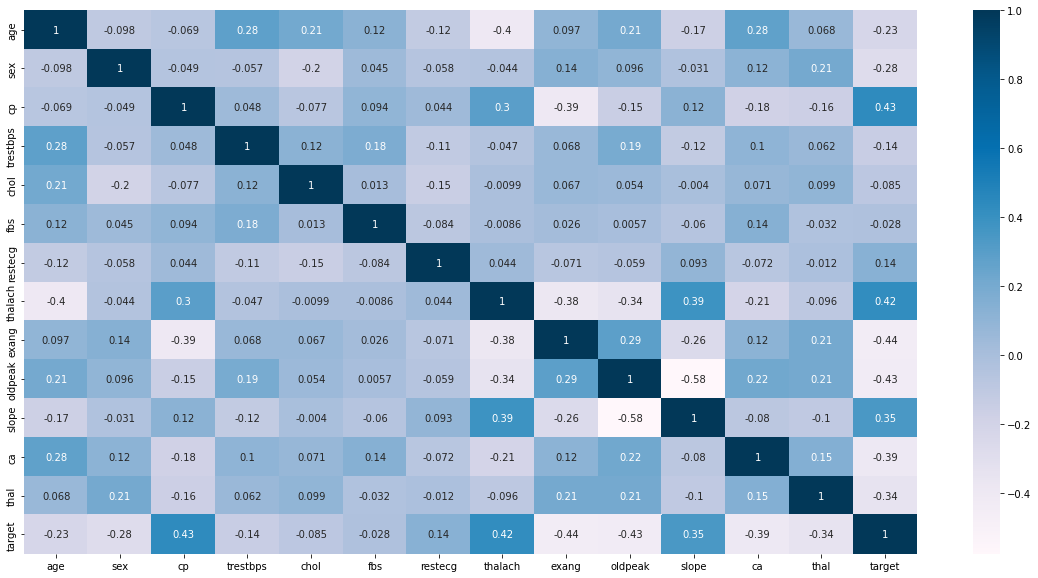

In [ ]:
# correlação de variaveis
corr = dfheart.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='PuBu')

Text(0.5, 0, 'Ages')

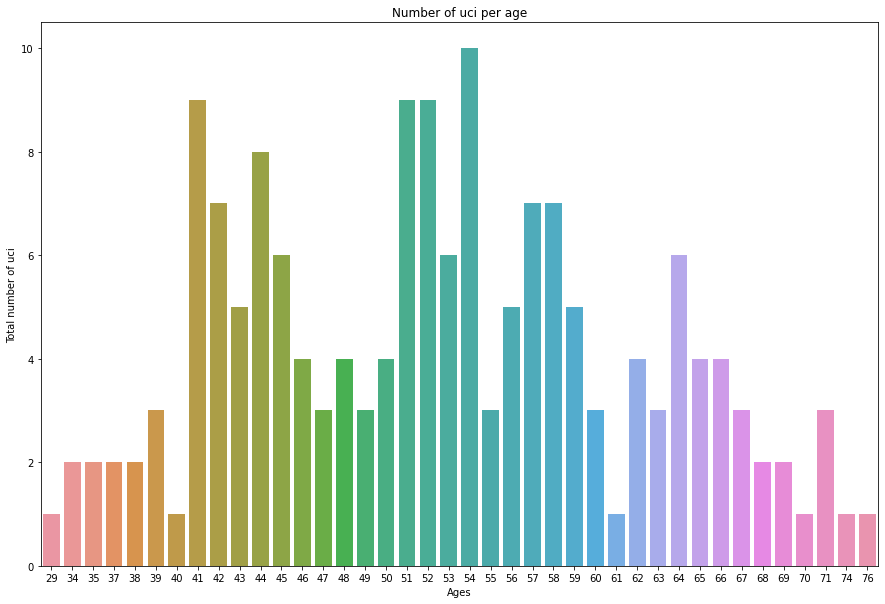

In [ ]:
aux_graph = dfheart[dfheart['target'] == 1]
plt.figure(figsize=(15,10))
sns.countplot(x='age',data=aux_graph)
plt.title('Number of uci per age')
plt.ylabel('Total number of uci')
plt.xlabel('Ages')


É POSSIVEL OBSERVAR O CRESCIMENTO DE DOENÇAS CARDIACAS A PARTIR DOS 40

In [ ]:
# UTILIZANDO PCA PARA SEPARAR A CLASSE TARGET EN 2 DIMENSÕES
pca = PCA(n_components = 2)
dfpca = pca.fit_transform(dfheart.drop(columns=['target']))
dfpca = pd.DataFrame(dfpca, columns=['V1', 'V2'])
dfpca['target'] = dfheart['target']
dfpca.head()

,V1,V2,target
0,-12.267345,2.873838,1
1,2.690137,-39.871374,1
2,-42.950214,-23.636820,1
3,-10.944756,-28.438036,1
4,106.979053,-15.874468,1


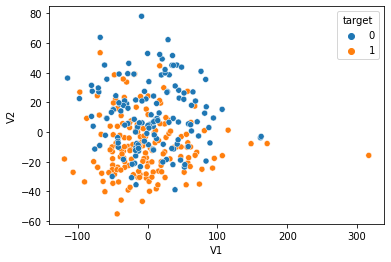

In [ ]:
sns.scatterplot(x='V1', y='V2', hue='target', data=dfpca)

AS CLASSES SE APRESENTAM COM POUCA SEPARAÇÃO, DIFICULTANDO A CLASSIFICAÇÃO

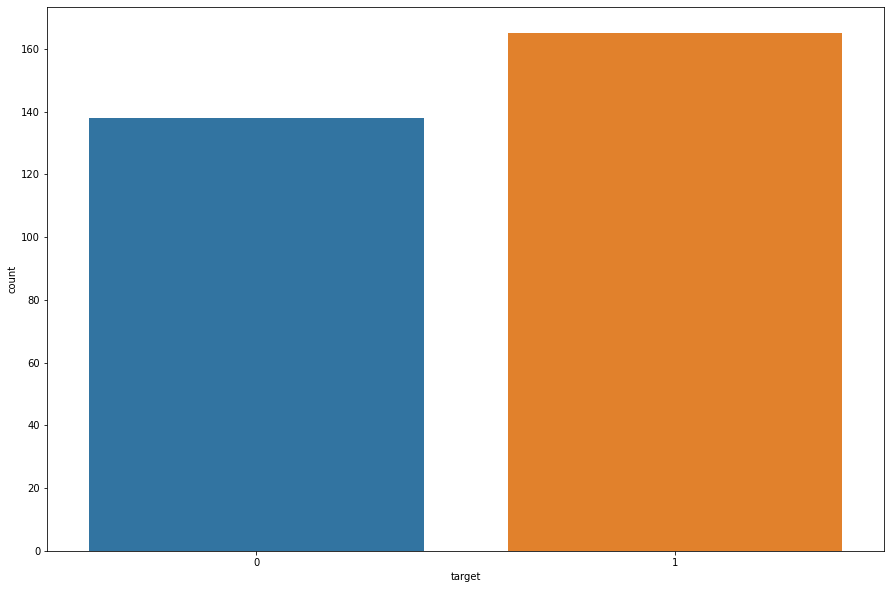

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='target',data=dfheart)

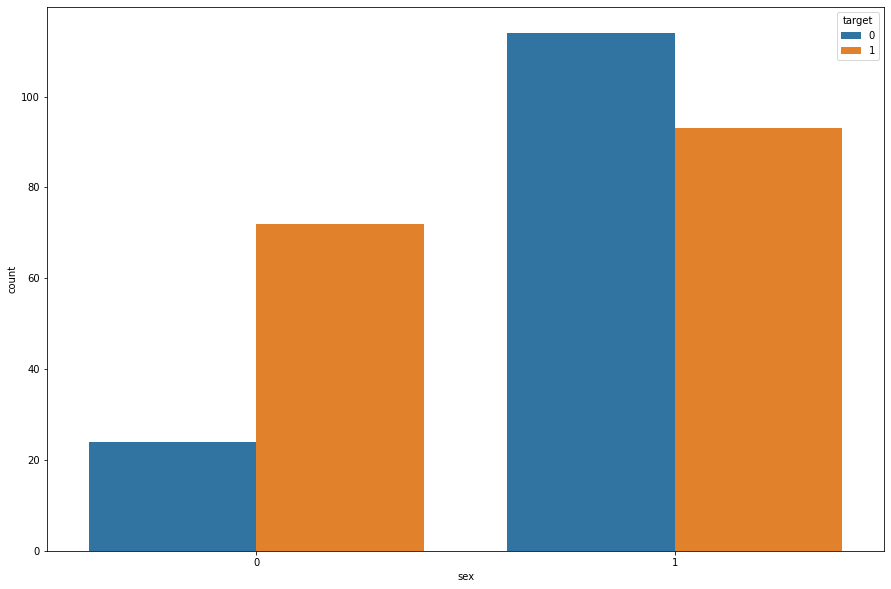

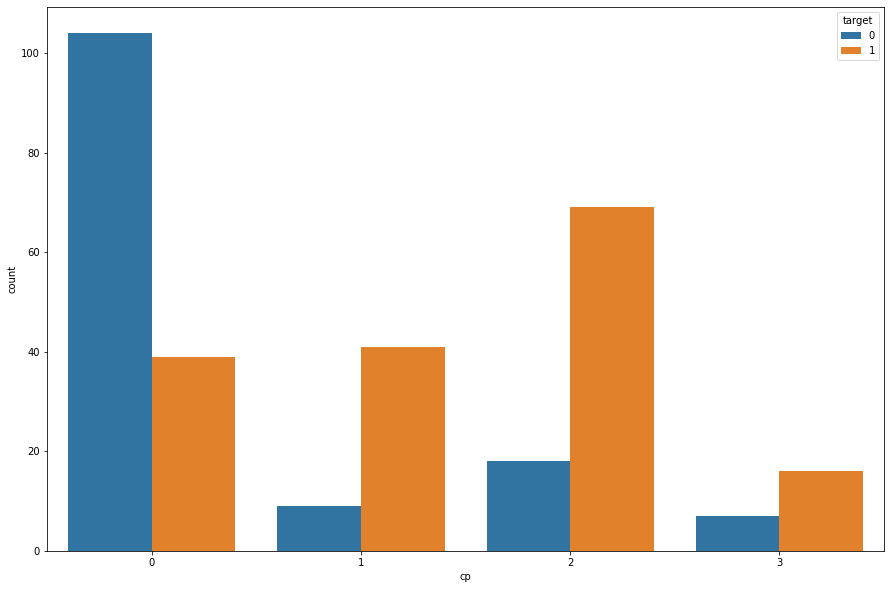

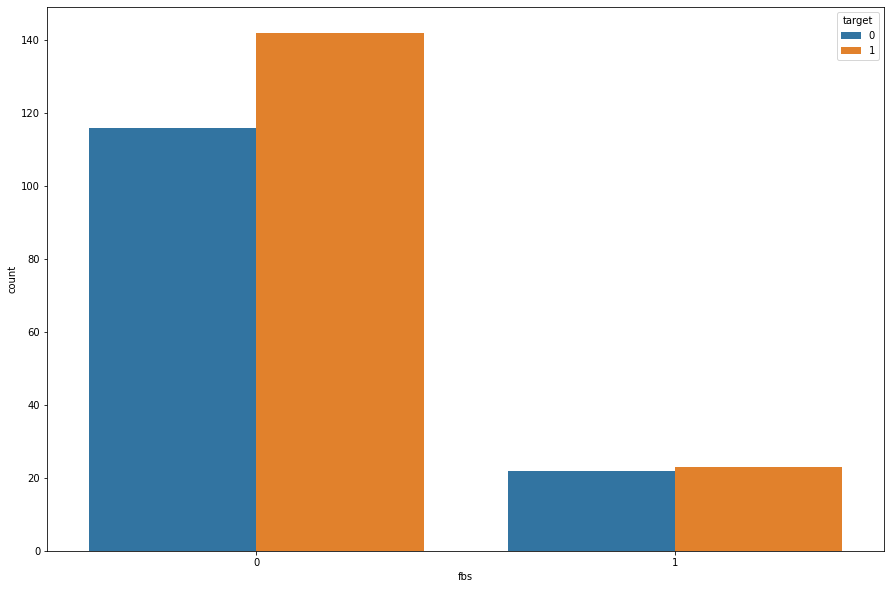

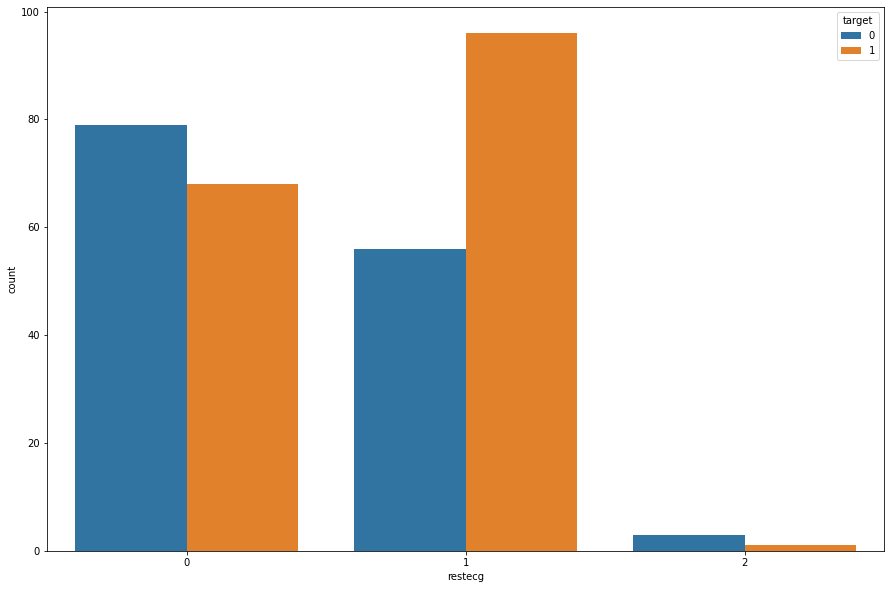

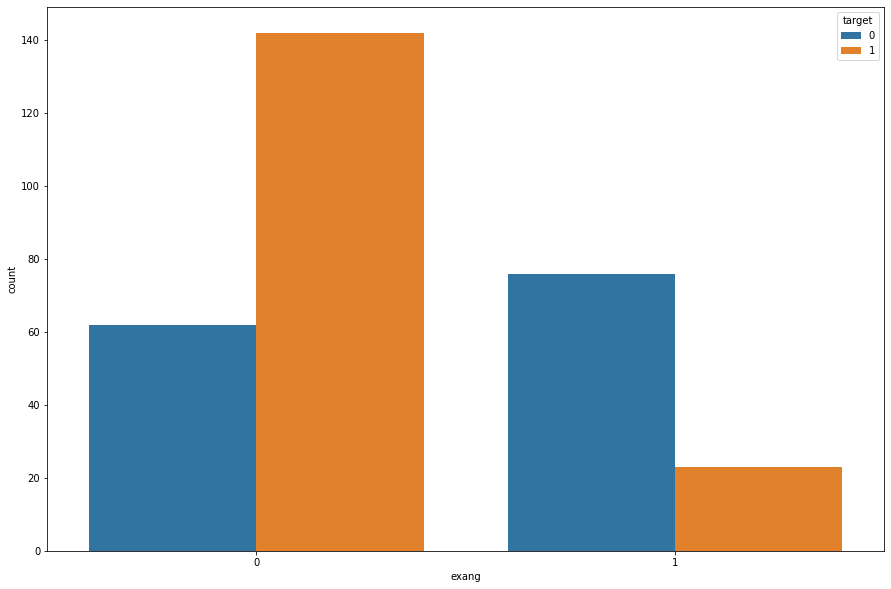

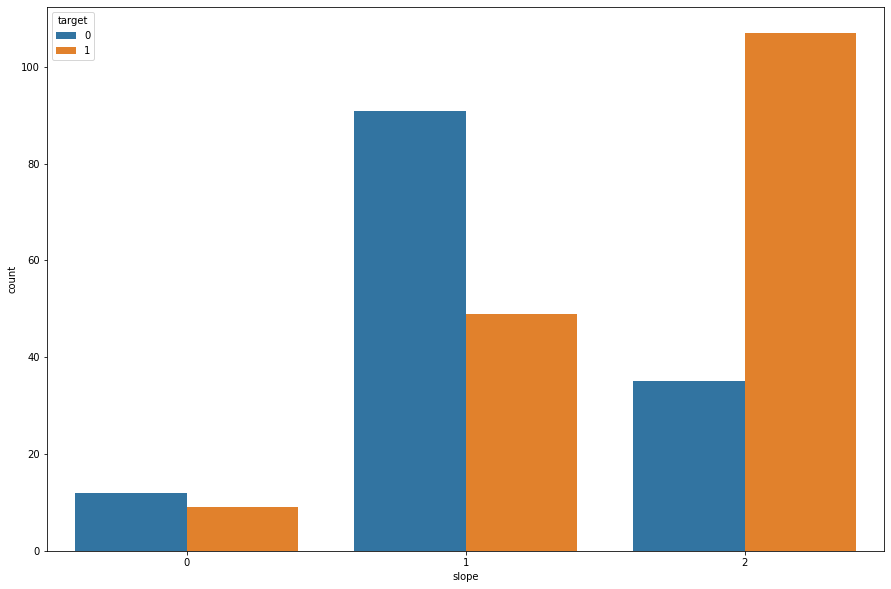

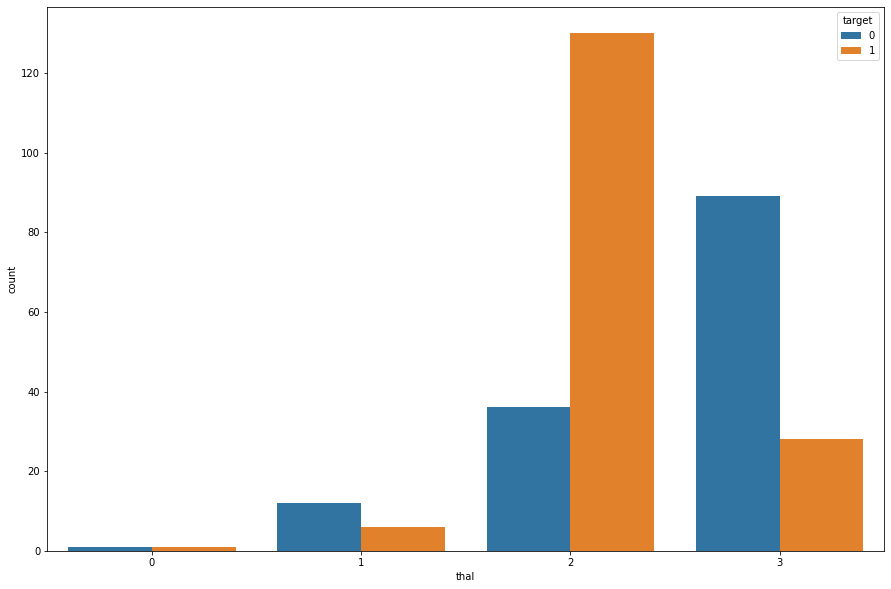

In [ ]:
cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in cols:
    plt.figure(figsize=(15,10))
    sns.countplot(x=col, data=dfheart, hue='target')
    plt.show()

# 5. TRATANDO OS DADOS

In [ ]:
# tratando as variáveis categóricas - as outras variáveis ja se encontram padronizadas
dfheart = pd.get_dummies(dfheart, columns=['cp', 'restecg', 'slope', 'thal'])


# 6. MODELAGEM

UTILIZAREMOS OS SEGUINTES MODELOS:
Logistic Regression
Decision 
Random Forest
Xgboosting

TREINO/TESTE

In [ ]:
X = dfheart.drop(columns=['target'])
Y = dfheart[['target']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
results = {'Models' : ['LR', 'DT', 'RF', 'XGB'],
           'Acurracy' : [],
           'Precision' : [],
           'Recall' : [],
           'F1-score' : []
          }

6.1 LOGISTIC REGRESSION

In [ ]:
clf = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
results['Acurracy'].append(accuracy_score(y_test, y_pred))
results['Precision'].append(precision_score(y_test, y_pred))
results['Recall'].append(recall_score(y_test, y_pred))
results['F1-score'].append(f1_score(y_test, y_pred))

6.2 DECISION TREE

In [ ]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
results['Acurracy'].append(accuracy_score(y_test, y_pred))
results['Precision'].append(precision_score(y_test, y_pred))
results['Recall'].append(recall_score(y_test, y_pred))
results['F1-score'].append(f1_score(y_test, y_pred))

6.3 XGBOOSTING

In [ ]:
clf = XGBClassifier().fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
results['Acurracy'].append(accuracy_score(y_test, y_pred))
results['Precision'].append(precision_score(y_test, y_pred))
results['Recall'].append(recall_score(y_test, y_pred))
results['F1-score'].append(f1_score(y_test, y_pred))

#7 RESULTADOS

In [ ]:
print(results)

{'Models': ['LR', 'DT', 'RF', 'XGB'], 'Acurracy': [0.8688524590163934, 0.819672131147541, 0.8360655737704918], 'Precision': [0.9285714285714286, 0.8387096774193549, 0.8666666666666667], 'Recall': [0.8125, 0.8125, 0.8125], 'F1-score': [0.8666666666666666, 0.8253968253968254, 0.8387096774193549]}


A Métrica selecionada será a F1-SCORE

# 8.OTIMIZANDO

In [ ]:
def otimizacao(clf, params):
  grid = GridSearchCV(clf, param_grid=params, scoring='recall', cv=5)
  grid.fit(X_train, y_train)
  return grid.best_estimator_

In [ ]:
# Parâmetros para Logistic Regression
parms_LR = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : [0.001, 0.1, 1],
    'class_weight' : [None, 'balanced'],
    'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'n_jobs' : [-1]
}

In [ ]:
# Parâmetros para Random Forest
params_RF = {
    'n_estimators' : [100, 120, 140, 160, 200],
    'max_depth' : [None, 5, 7, 10],
    'max_leaf_nodes' : [None, 5, 10, 30],
    'class_weight' : [None, 'balanced'],
    'criterion' : ['gini', 'entropy', 'log_Loss']
}

In [ ]:
# Comparando as metricas
comparation = {'Models' : ['Logistic Regression', 'Random Forest'],
           'Accurracy' : [],
           'Precision' : [],
           'Recall' : [],
           'F1-score' : []
          }

In [ ]:
# Logistic Regression
clf = otimizacao(LogisticRegression(random_state=42), params= parms_LR)
y_pred = clf.predict(X_test)
comparation['Accurracy'].append(accuracy_score(y_test, y_pred))
comparation['Precision'].append(precision_score(y_test, y_pred))
comparation['Recall'].append(precision_score(y_test, y_pred))
comparation['F1-score'].append(f1_score(y_test, y_pred))

In [ ]:
# Random Forest
clf = otimizacao(RandomForestClassifier(random_state=42, n_jobs=-1), params= params_RF)
y_pred = clf.predict(X_test)
comparation['Accurracy'].append(accuracy_score(y_test, y_pred))
comparation['Precision'].append(precision_score(y_test, y_pred))
comparation['Recall'].append(precision_score(y_test, y_pred))
comparation['F1-score'].append(f1_score(y_test, y_pred))

# 9. COMPARAÇÃO DOS MODELOS

In [ ]:
print(comparation)

{'Models': ['Logistic Regression', 'Random Forest'], 'Accurracy': [0.5245901639344263, 0.5245901639344263, 0.8852459016393442], 'Precision': [0.5245901639344263, 0.5245901639344263, 0.8787878787878788], 'Recall': [0.5245901639344263, 0.5245901639344263, 0.8787878787878788], 'F1-score': [0.6881720430107526, 0.6881720430107526, 0.8923076923076922]}


In [ ]:
clf

RandomForestClassifier(criterion='entropy', max_leaf_nodes=5, n_estimators=160,
                       n_jobs=-1, random_state=42)

#9.MATRIZ DE CONFUSÃO

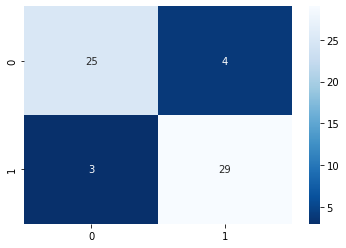

In [ ]:
y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues_r', annot=True)

# 10.IMPORTANCIA DA VARIÁVEL

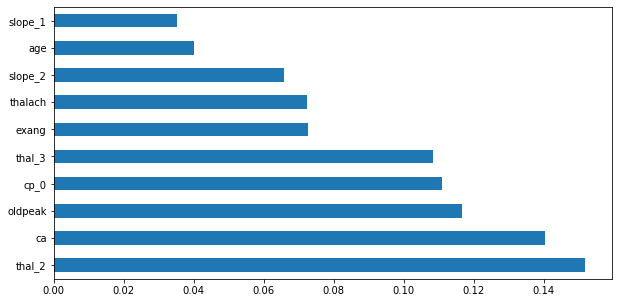

In [ ]:
from IPython.core.pylabtools import figsize
feat_importance = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importance.nlargest(10).plot(kind='barh', figsize=(10,5))


#11 ÁRVORE DE DECISÃO

In [ ]:
Y= Y.astype(str)

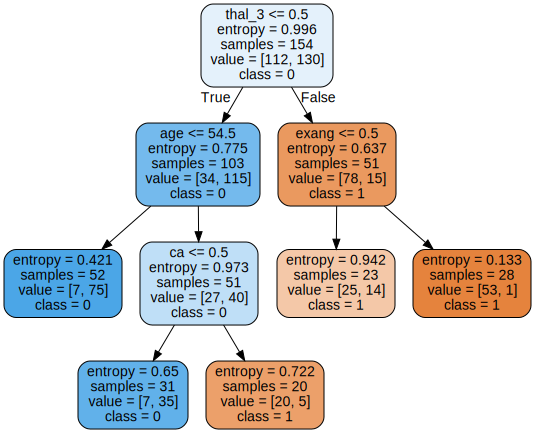

<Figure size 1440x1080 with 0 Axes>

In [ ]:
fn= X.columns
cn= Y['target'].value_counts().index
plt.figure(figsize(20,15))
dot_data = tree.export_graphviz(clf.estimators_[159],
               feature_names = fn,
               class_names=cn,
               filled = True, impurity=True, 
                           rounded=True)
graph = graphviz.Source(dot_data, format='png')
graph